# The iris data

Using what you learned about ensemble plots and scatter plots while working with the Anscombe quartet, create a 4 by 4 ensemble of scatterplots of the iris data. Your plot should resemble the one found here: [en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg), however you are are encouraged to improve upon these graphical decisions. 

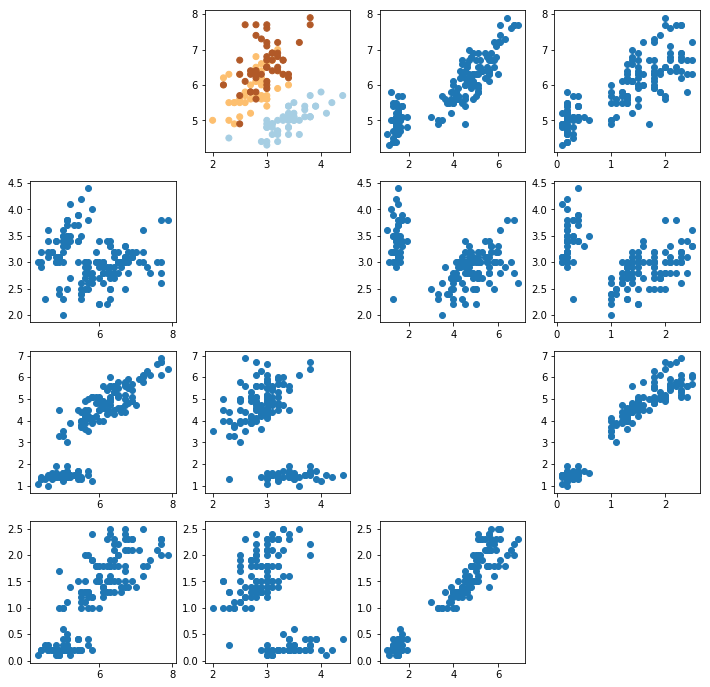

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./example_graph/iris.csv')
# Note that we're not creating a figure and axes together.
# It's possible to create axes within the figure one at 
# a time, which is often preferable when working with 
# many axes in an ensemble.
fig = plt.figure(figsize=(12, 12), facecolor='white')
# The syntax for this argument is [rows][columns][order]. 
# So 441 menas 4 rows, 4 colomns, this is the first chart 
# (assuming z-order, or left-to-right, top-to-bottom.
ax = fig.add_subplot(442)
# Incidentally, since `matplotlib` functions tend to be 
# overloaded, this is equivalent to: 
# fig.add_subplot(4, 4, 1) 
c = [df['species'].unique().tolist().index(df.loc[i, 'species']) 
     for i in df.index]
ax.scatter(df['sepal_width'], df['sepal_length'],
           c=c, cmap='Paired')
ax = fig.add_subplot(4, 4, 3)
ax.scatter(df['petal_length'], df['sepal_length'])
ax = fig.add_subplot(4, 4, 4)
ax.scatter(df['petal_width'], df['sepal_length'])
ax = fig.add_subplot(4, 4, 5)
ax.scatter(df['sepal_length'], df['sepal_width'])
ax = fig.add_subplot(4, 4, 7)
ax.scatter(df['petal_length'], df['sepal_width'])
ax = fig.add_subplot(4, 4, 8)
ax.scatter(df['petal_width'], df['sepal_width'])
ax = fig.add_subplot(4, 4, 9)
ax.scatter(df['sepal_length'], df['petal_length'])
ax = fig.add_subplot(4, 4, 10)
ax.scatter(df['sepal_width'], df['petal_length'])
ax = fig.add_subplot(4, 4, 12)
ax.scatter(df['petal_width'], df['petal_length'])
ax = fig.add_subplot(4, 4, 13)
ax.scatter(df['sepal_length'], df['petal_width'])
ax = fig.add_subplot(4, 4, 14)
ax.scatter(df['sepal_width'], df['petal_width'])
ax = fig.add_subplot(4, 4, 15)
ax.scatter(df['petal_length'], df['petal_width'])
ax16 = fig.add_subplot(4, 4, 16)
ax16.set_xticks([])
ax16.set_yticks([])
plt.setp(ax16.spines.values(), color='white')
plt.show()


Obviously we'd like each species of flower to be colored differently in these plots. I'll leave it to you to work out a solution for this. One way to approach it is like so ...

In [23]:
vars = ['foo', 'foo', 'foo', 'bar', 'baz', 'bar', 'bar', 'foo', 'baz']
hues = [['foo', 'bar', 'baz'].index(vars[i]) for i in range(len(vars))]
print(hues)
print(df['species'].unique())

[0, 0, 0, 1, 2, 1, 1, 0, 2]
['setosa' 'versicolor' 'virginica']


## Cutomizing `matplotlib`

Sometimes it might be preferable to pass fewer `kwargs` to your functions. Especially if you find yourself passing the same lineweights, colormaps, etc. You can modify `matplotlib`'s defaults with the following code, and a list of the available parameters can be found here: [matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rcParams](https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rcParams)

In [16]:
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Paired'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.color'] = 'r'


In [40]:
[df['species'].unique().tolist().index(df.loc[i, 'species']) 
 for i in df.index]

AttributeError: 'list' object has no attribute 'tolist'

In [65]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [74]:
import itertools
for i in enumerate(itertools.product([1, 2, 3], [1, 2, 3])): print(i)

(0, (1, 1))
(1, (1, 2))
(2, (1, 3))
(3, (2, 1))
(4, (2, 2))
(5, (2, 3))
(6, (3, 1))
(7, (3, 2))
(8, (3, 3))


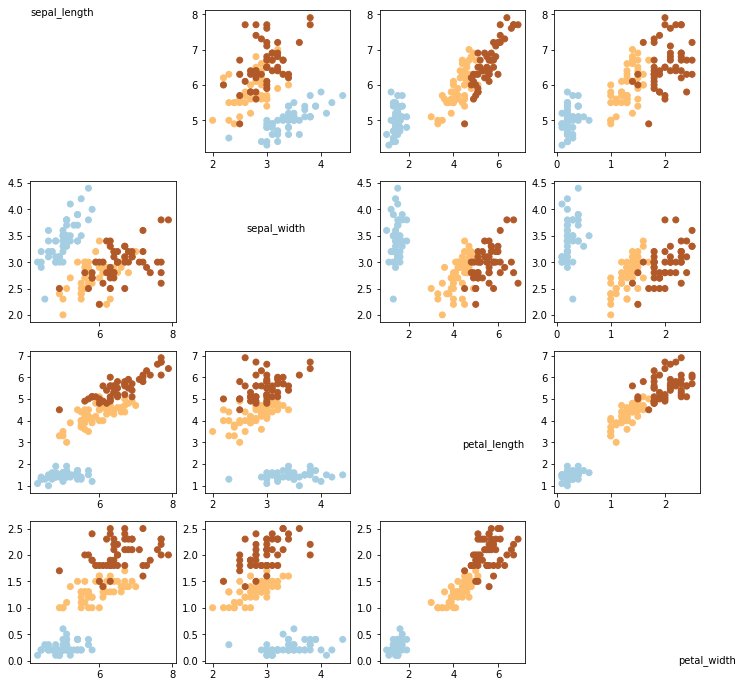

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import itertools

df = pd.read_csv('./example_graph/iris.csv')
fig = plt.figure(figsize=(12, 12), facecolor='white')
c = [df['species'].unique().tolist().index(df.loc[i, 'species']) 
     for i in df.index]

for i, (row, col) in enumerate(itertools.product(range(4), range(4))):
    if row != col:
        ax = fig.add_subplot(4, 4, i+1)
        ax.scatter(df.iloc[:, col], df.iloc[:, row],
                   c=c, cmap='Paired')
    else:
        # print((row+1)*.25-.125)
        fig.text(x=((row+1)*.25-.125), 
                 s=df.columns[row], 
                 y=1-((col+1)*.25-.125))
plt.show()
